# Navigation

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.8 which is incompatible.


The environment is already saved in the Workspace and can be accessed at the file path provided below.  Please run the next code cell without making any changes.

In [2]:
from unityagents import UnityEnvironment
import numpy as np

# please do not modify the line below
env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
print(brain)

Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [ 1.          0.          0.          0.          0.84408134  0.          0.
  1.          0.          0.0748472   0.          1.          0.          0.
  0.25755     1.          0.          0.          0.          0.74177343
  0.          1.          0.          0.          0.25854847  0.          0.
  1.          0.          0.09355672  0.          1.          0.          0.
  0.31969345  0.          0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agent while it is training**, and you should set `train_mode=True` to restart the environment.

Initializing all library needed before running agent learning

# Necessary library for agent learning and performance evaluation

In [12]:
import logging
import time
import matplotlib.pyplot as plt
from Agent import Agent
import torch
logging.basicConfig(level=logging.INFO)
from collections import deque  
import pandas as pd


# Deep Q-Network and Double Deep Q-Network Training

In [15]:
def dqn(n_episodes=1500, max_t=400, eps_start=1.0, eps_end=0.01, eps_decay=0.995,pth_file = 'checkpoint.pth'):
    eps=eps_start                                         # initialize the score
    scores_window = deque(maxlen=100)  # last 100 scores
    scores = []
    logging.info('Starting of agent training ......')
    for episode in range(1,n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0]            # get the current state
        score = 0
        for time_step in range(max_t):
            action = agent.act(state,eps)        # select an action
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            agent.step(state, action, reward, next_state, done)

            score += reward                                # update the score
        
            state = next_state                             # roll over the state to next time step
            eps = max(eps_end,eps_decay*eps)
            if done:
                break
        scores.append(score)
        scores_window.append(score)       # save most recent score
        
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(episode, np.mean(scores_window)), end="")
        if episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(episode, np.mean(scores_window)))
        if np.mean(scores_window)>=13:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), pth_file)
            break
    return scores,reward

INFO:root:Starting of agent training ......


state size : 37
action size : 4
DDQN is now : False
Episode 100	Average Score: 3.90
Episode 200	Average Score: 7.70
Episode 300	Average Score: 12.17
Episode 328	Average Score: 13.00
Environment solved in 228 episodes!	Average Score: 13.00
Total run time to achieve average score of 13 : 300.9605655670166 seconds 


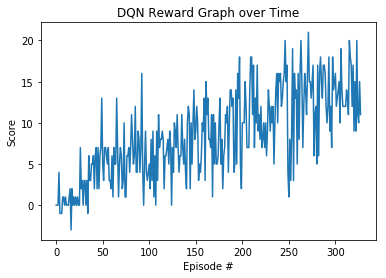

INFO:root:Starting of agent training ......


state size : 37
action size : 4
DDQN is now : True
Episode 100	Average Score: 0.79
Episode 200	Average Score: 5.87
Episode 300	Average Score: 8.10
Episode 400	Average Score: 10.79
Episode 457	Average Score: 13.07
Environment solved in 357 episodes!	Average Score: 13.07
Total run time to achieve average score of 13 : 429.7580146789551 seconds 


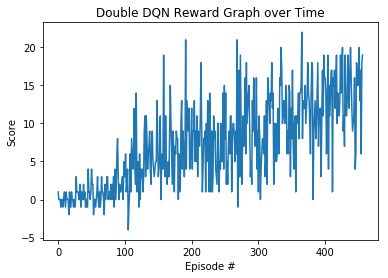

In [16]:
agent = Agent(state_size,action_size,99,False)
############### Training block of Agent and measuring the time needed to achieve goal ################
start_time = time.time()
scores_dqn_base,reward = dqn(pth_file = 'checkpoint_dqn.pth')
print("Total run time to achieve average score of 13 : %s seconds " % (time.time() - start_time))
############### plot the scores #########
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores_dqn_base)), scores_dqn_base)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title('DQN Reward Graph over Time')
plt.show()


agent = Agent(state_size,action_size,99,True)
############### Training block of Agent and measuring the time needed to achieve goal ################
start_time = time.time() # Measure starting time of entering training of agent
scores_dqn_ddqn,reward = dqn(pth_file = 'checkpoint_ddqn.pth')
print("Total run time to achieve average score of 13 : %s seconds " % (time.time() - start_time))
############### plot the scores #########
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores_dqn_ddqn)), scores_dqn_ddqn)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title('Double DQN Reward Graph over Time')
plt.show()

# Result Plotting for DQN and DDQN on rolling mean and rolling std for stability comparison

In Minh et al. 2015 , DQN through multiple experiment on different games shown to have overestimation on Q-value which resultant in instability on reward. Reference paper https://arxiv.org/pdf/1509.06461.pdf

Section below is to using rolling statistic to show the result of fluctuation especially in the later stage of the episode during exploitation. Ideally rewards should be consistent as agent is referring to the Q-value after exploration stage using GLIE method.

Below section is comparison between DQN and DDQN performance.

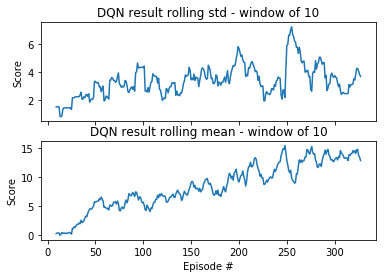

In [19]:

fig, axs = plt.subplots(2)
axs[0].plot(np.arange(len(pd.Series(scores_dqn_base).rolling(10).std())), pd.Series(scores_dqn_base).rolling(10).std())
axs[0].set_ylabel('Score')
axs[0].set_xlabel('Episode #')
axs[0].set_title('DQN result rolling std - window of 10')

axs[1].plot(np.arange(len(pd.Series(scores_dqn_base).rolling(10).mean())), pd.Series(scores_dqn_base).rolling(10).mean())
axs[1].set_ylabel('Score')
axs[1].set_xlabel('Episode #')
axs[1].set_title('DQN result rolling mean - window of 10')

for ax in axs.flat:
    ax.label_outer()
    

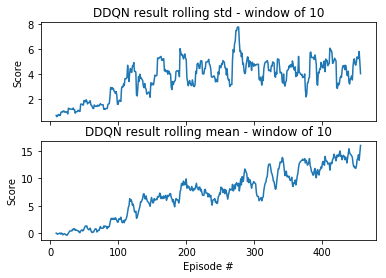

In [18]:
# import pandas as pd

fig, axs = plt.subplots(2)
axs[0].plot(np.arange(len(pd.Series(scores_dqn_ddqn).rolling(10).std())), pd.Series(scores_dqn_ddqn).rolling(10).std())
axs[0].set_ylabel('Score')
axs[0].set_xlabel('Episode #')
axs[0].set_title('DDQN result rolling std - window of 10')

axs[1].plot(np.arange(len(pd.Series(scores_dqn_ddqn).rolling(10).mean())), pd.Series(scores_dqn_ddqn).rolling(10).mean())
axs[1].set_ylabel('Score')
axs[1].set_xlabel('Episode #')
axs[1].set_title('DDQN result rolling mean - window of 10')

for ax in axs.flat:
    ax.label_outer()


When finished, you can close the environment.

In [8]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agent while it is training.  However, **_after training the agent_**, you can download the saved model weights to watch the agent on your own machine! 